# Problem statement

>> Study and Experiment with Implementation of CNN using keras/tensorflow , Build and submit a prototype binary deep learning based image



In [1]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from keras.models import load_model

import os
from os import listdir
import cv2
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# Loading Directories

In [2]:
# Loading Train directory
train_data_dir='./Cats_vs_Dogs/training_set/training_set'

# Loading Test Directory
validation_data_dir='./Cats_vs_Dogs/test_set/test_set'




# Loading Some Scrapped Image Samples

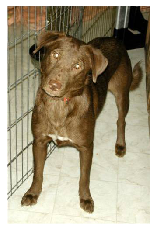

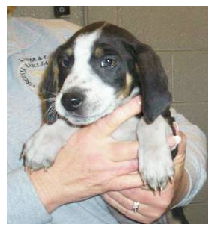

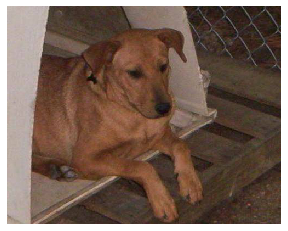

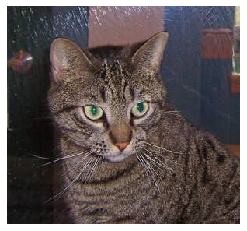

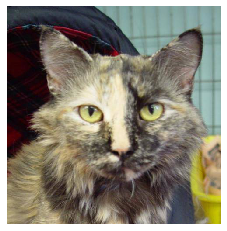

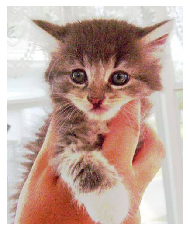

In [3]:
# Sample images which I have scrapped from amazon
import matplotlib.image as mpimg
dogs_train='./Cats_vs_Dogs/training_set/training_set/dogs'
cats_train='./Cats_vs_Dogs/training_set/training_set/cats'

Dir_train=[dogs_train, cats_train]
for dirs in Dir_train:
    k=listdir(dirs)
    for i in k[:3]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [4]:
# Defining Dimensions for the image to be input and then loading the images
input_shape=(128,128,3)
img_width=128
img_height=128
nb_train_samples=2000
nb_validation_samples=500
batch_size=8
epoch=50


# Defining Generators

In [5]:
# Training Data Generator( Data Augmentation on Training Images)

train_generator_augmented=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
train_generator=train_generator_augmented.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='binary')

# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='binary')




Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Defining the Model

In [6]:

# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0

# Defining Early stopping and Model check point

In [7]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('cat_dog.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fitting Images

In [8]:
# Fitting the Training Data
history = model.fit_generator(
    train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[ES,MC]
  
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.5095
Epoch 00001: val_accuracy improved from -inf to 0.55040, saving model to cat_dog.h5
250/250 [==============================] - 32s 129ms/step - loss: 0.6941 - accuracy: 0.5095 - val_loss: 0.6931 - val_accuracy: 0.5504
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5095
Epoch 00002: val_accuracy did not improve from 0.55040
250/250 [==============================] - 32s 128ms/step - loss: 0.6931 - accuracy: 0.5095 - val_loss: 0.6931 - val_accuracy: 0.5222
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5025
Epoch 00003: val_accuracy did not improve from 0.55040
250/250 [==============================] - 33s 132ms/step - loss: 0.6931 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.4859
Epoch 4/50
250/250 [====================

In [9]:
# Model Evaluation
evl=model.evaluate(validation_generator, steps=1)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.6250
Test Loss 0.6931469440460205
Test Accuracy 0.625


# Saving the Model

In [10]:
# Saving the best model where val_accuracy is maximum.
model.save('cat_dog.h5')

In [11]:
# 50 Epochs Summary
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.694112,0.5095,0.693147,0.550403
1,0.693146,0.5095,0.693147,0.522177
2,0.693146,0.5025,0.693147,0.485887
3,0.693146,0.5025,0.693147,0.522177
4,0.693146,0.5040,0.693147,0.493952
5,0.693146,0.5030,0.693147,0.473790
6,0.693146,0.5140,0.693147,0.489919
7,0.693146,0.5105,0.693147,0.508065
8,0.693146,0.5160,0.693147,0.491935
9,0.693146,0.4855,0.693147,0.485887


# Visualizing Training

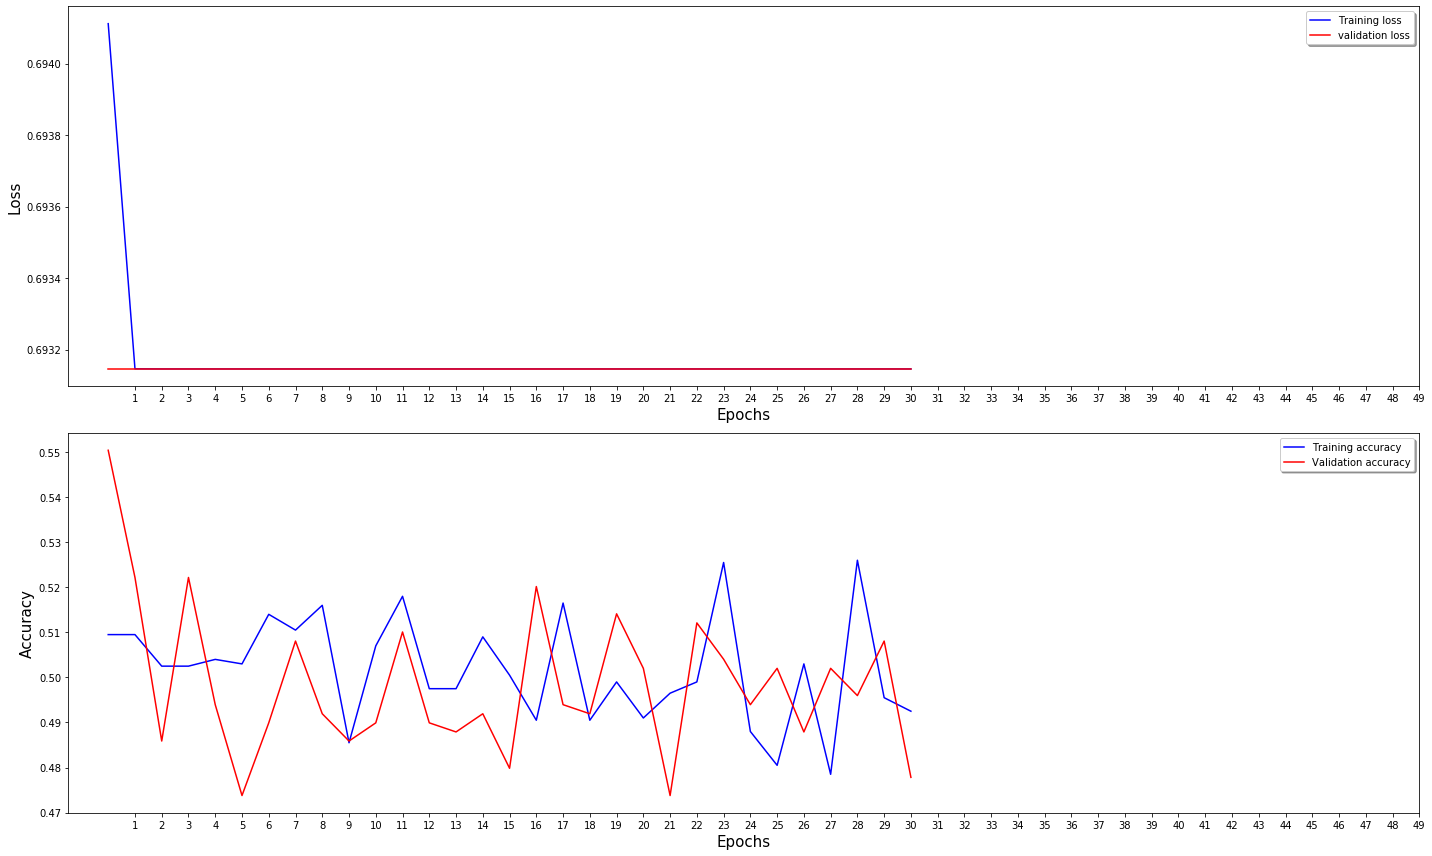

In [12]:
# Visualizing  Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1),)
ax1.set_xlabel('Epochs' ,fontsize=15)
ax1.set_ylabel('Loss' ,fontsize=15)
ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xlabel('Epochs' ,fontsize=15)
ax2.set_ylabel('Accuracy' ,fontsize=15)
ax2.set_xticks(np.arange(1, epoch, 1))

ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [13]:
# As we can see that there are 3 classes for the 90 test images
print(validation_generator.classes)
len(validation_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

1000

In [14]:
# checking class indices
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

# Loading the Model

In [15]:
# Lets load our model
saved_model = load_model('cat_dog.h5')

In [16]:
# Predicted samples of the test images
cats_train='./Cats_vs_Dogs/test_set/test_set/cats'
dogs_train='./Cats_vs_Dogs/test_set/test_set/dogs'


test_Dir=[cats_train,dogs_train]
Predicted_class=[]
for test_dir in test_Dir:
    k=listdir(test_dir)
    for i in  k[:]:
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        #plt.imshow(img)
        #plt.axis('off')
        #plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            Predicted_class.append("Cat")
        elif final==1:
            Predicted_class.append("Dog")
        

# Printing the Dataframe having all predictions

In [17]:
res = pd.DataFrame()
res['Predicted_Label']=Predicted_class
res['Actual_Label']=validation_generator.classes
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Cat', 1: 'Dog'})
res.to_csv('final_cat_dog.csv', index=False)
res.tail(20)

,Predicted_Label,Actual_Label
980,Dog,Dog
981,Dog,Dog
982,Cat,Dog
983,Dog,Dog
984,Dog,Dog
985,Cat,Dog
986,Dog,Dog
987,Dog,Dog
988,Dog,Dog
989,Dog,Dog


# Predicting some image samples

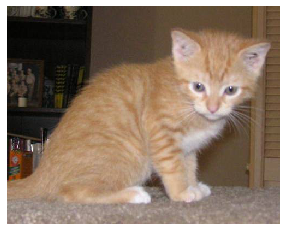

Cat


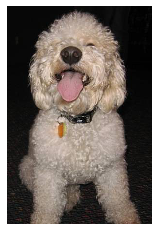

Dog


In [26]:
test_Dir=[cats_train,dogs_train]
Predicted_class=[]
for test_dir in test_Dir:
    k=listdir(test_dir)
    for i in  k[2:3]:
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            print("Cat")
        elif final==1:
            print("Dog")

# Printing the confusion matrix

(2.0, 0.0)

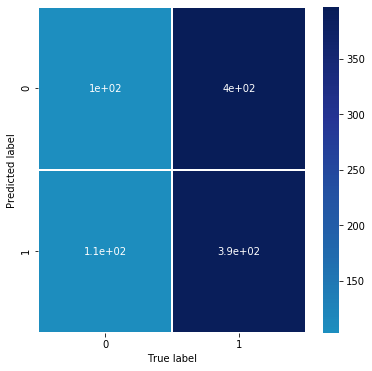

In [19]:
# show the confusion matrix of our predictions
# Confusion matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = res["Predicted_Label"]
y_test = res['Actual_Label']
#class_names = validation_generator.class_indices.keys()

fig, ax =plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            linewidths=1,
            center=0,
            cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)